In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [7]:
missing_value=["?"]
data=pd.read_csv('.\soybean-large.data',names=['Classes','date','plant-stand','precip','temp','hail','crop-hist','area-damaged','severity','seed-tmt','germination','plant-growth','leaves','leafspots-halo','leafspots-marg','leafspot-size','leaf-shread','leaf-malf','leaf-mild','stem','lodging','stem-cankers','canker-lesion','fruiting-bodies','external decay','mycelium','int-discolor','sclerotia','fruit-pods','fruit spots','seed','mold-growth','seed-discolor','seed-size','shriveling','roots'],na_values=missing_value)
data.head()

,Classes,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.impute import SimpleImputer
impute_Cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent" )
data.iloc[:,1:] =impute_Cat.fit_transform(data.iloc[:,1:])
data

,Classes,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,5.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,herbicide-injury,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
304,herbicide-injury,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
305,herbicide-injury,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
target=encoder.fit_transform(data["Classes"])

In [10]:
features= data.drop("Classes",axis='columns')

In [11]:
#splitting into tarin test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=42)

In [12]:
#MOdeling
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50)
model.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

C:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


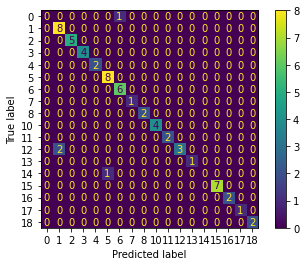

In [13]:
#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
plot_confusion_matrix (model, xtest, ytest)

In [14]:
ypred = model.predict(xtest)
confusion_matrix(ytest, ypred)

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [15]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(model, features, target, cv=10)
cv
cv.mean()

C:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.9121505376344086

In [16]:
accuracy_score(ypred, ytest)

0.9354838709677419

In [17]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    model, 
    param_grid={
        "criterion": ["gini", "entropy"],
        "max_features": ["sqrt", "auto"],
        "min_samples_split": [2,3,4,5,6,7,8,9,11, 15, 20, 25]
    }, cv = 8, scoring="accuracy", verbose=0
)
grid.fit(features, target)

C:\python\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(


GridSearchCV(cv=8, estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 11, 15,
                                               20, 25]},
             scoring='accuracy')

In [19]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=50)

In [20]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 4}

In [21]:
bmodel = grid.best_estimator_
bmodel.fit(features["date"], target)
# Visualization

xmin, xmax = features["date"][:, 0].min(), target[:, 0].max()
ymin, ymax = features["date"][:, 1].min(), target[:, 1].max()

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
xx.shape, yy.shape

xtest = np.c_[xx, yy]
xtest.shape
ypred = model.predict(xtest)
ypred = ypred.reshape(yy.shape)
ypred

plt.figure(1, figsize=(20,8))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, ypred, shading='auto')

plt.scatter(features["date"][:, 0], features["date"][:, 1], c=target, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[6. 4. 3. 3. 6. 5. 5. 4. 6. 4. 6. 4. 3. 6. 6. 5. 6. 4. 3. 5. 1. 1. 3. 0.
 0. 1. 1. 2. 1. 2. 0. 1. 2. 1. 2. 3. 0. 3. 2. 2. 2. 1. 0. 0. 3. 2. 0. 2.
 2. 0. 1. 1. 3. 2. 3. 1. 3. 2. 3. 1. 2. 3. 2. 3. 2. 1. 3. 3. 3. 3. 4. 4.
 3. 5. 5. 4. 5. 6. 5. 5. 4. 4. 4. 3. 5. 4. 4. 4. 4. 3. 5. 6. 1. 6. 4. 6.
 2. 6. 5. 1. 6. 2. 1. 4. 1. 2. 2. 4. 4. 5. 1. 2. 2. 2. 1. 1. 0. 2. 1. 2.
 5. 1. 1. 4. 1. 4. 2. 0. 1. 1. 1. 2. 3. 2. 1. 1. 5. 4. 3. 1. 4. 2. 2. 3.
 3. 2. 3. 3. 2. 5. 5. 4. 2. 3. 3. 3. 3. 4. 2. 4. 2. 3. 2. 4. 3. 3. 3. 3.
 4. 5. 6. 6. 4. 4. 4. 6. 3. 3. 5. 4. 5. 5. 6. 2. 3. 4. 6. 1. 6. 5. 5. 0.
 6. 5. 5. 6. 5. 6. 5. 5. 3. 3. 3. 3. 3. 2. 1. 2. 2. 2. 4. 4. 3. 6. 6. 5.
 6. 5. 6. 6. 5. 4. 6. 5. 5. 4. 4. 5. 6. 6. 5. 5. 4. 6. 4. 6. 4. 4. 5. 3.
 5. 5. 4. 5. 6. 5. 6. 5. 5. 6. 6. 4. 5. 5. 6. 4. 3. 5. 5. 5. 5. 4. 4. 4.
 3. 5. 5. 4. 5. 5. 3. 6. 5. 5. 5. 3. 6. 4. 4. 6. 5. 4. 4. 4. 4. 5. 4. 5.
 5. 5. 5. 6. 5. 1. 5. 5. 2. 3. 4. 3. 3. 4. 5. 1. 0. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.